In [2]:
# import
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from keras.src.layers import Pipeline
from scipy.odr import polynomial
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.linear_model import Ridge, LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.linear_model import Lasso, Ridge, ElasticNet
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier, plot_tree
from tensorflow.python.keras.saving.saved_model_experimental import sequential

In [3]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("fedesoriano/heart-failure-prediction")

pd.set_option('display.max_rows', None)

print("Path to dataset files:", path)

/Users/gatiengenevois/Desktop/IA01_projet/.venv/lib/python3.13/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


Path to dataset files: /Users/gatiengenevois/.cache/kagglehub/datasets/fedesoriano/heart-failure-prediction/versions/1


In [4]:
# load dataset
df = pd.read_csv(path + "/heart.csv")
print("Dataset shape:", df.shape)
print("Dataset 5 first rows:")
print(df.head())
print("Dataset description:")
print(df.describe())
print("Dataset values count:")
print(df.count())

Dataset shape: (918, 12)
Dataset 5 first rows:
   Age Sex ChestPainType  RestingBP  Cholesterol  FastingBS RestingECG  MaxHR  \
0   40   M           ATA        140          289          0     Normal    172   
1   49   F           NAP        160          180          0     Normal    156   
2   37   M           ATA        130          283          0         ST     98   
3   48   F           ASY        138          214          0     Normal    108   
4   54   M           NAP        150          195          0     Normal    122   

  ExerciseAngina  Oldpeak ST_Slope  HeartDisease  
0              N      0.0       Up             0  
1              N      1.0     Flat             1  
2              N      0.0       Up             0  
3              Y      1.5     Flat             1  
4              N      0.0       Up             0  
Dataset description:
              Age   RestingBP  Cholesterol   FastingBS       MaxHR  \
count  918.000000  918.000000   918.000000  918.000000  918.000000   

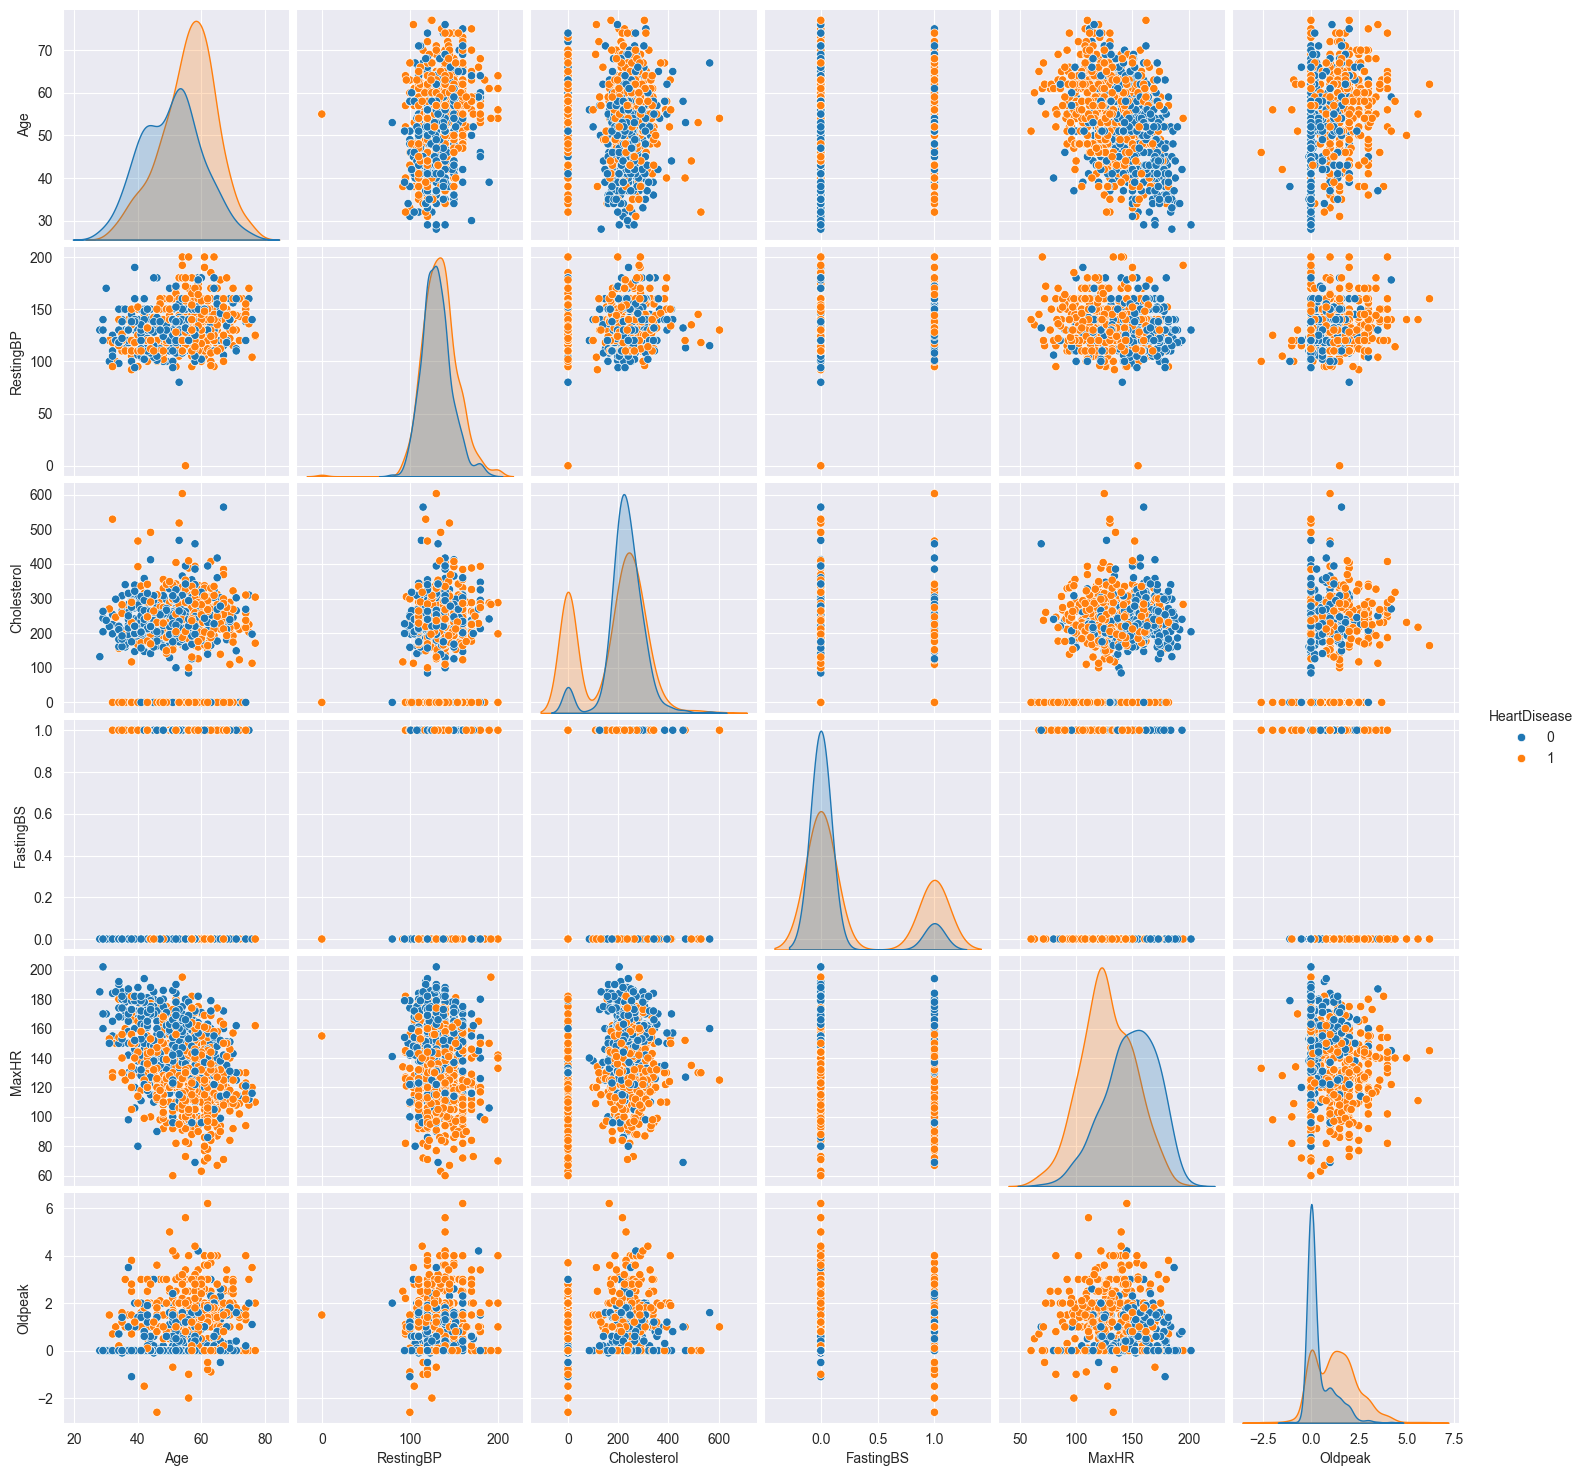

In [5]:
"""
Comprendre les caractéristiques du jeu de
données, leur distribution et leur relation entre elles ainsi qu'avec la variable cible.
L'objectif est de détecter les corrélations pertinentes entre les variables explicatives et
d'identifier les facteurs qui influencent le plus la sortie. Une analyse bien détaillée et
pertinente est attendue de vous.
"""

sns.pairplot(data=df, hue="HeartDisease")
plt.show()

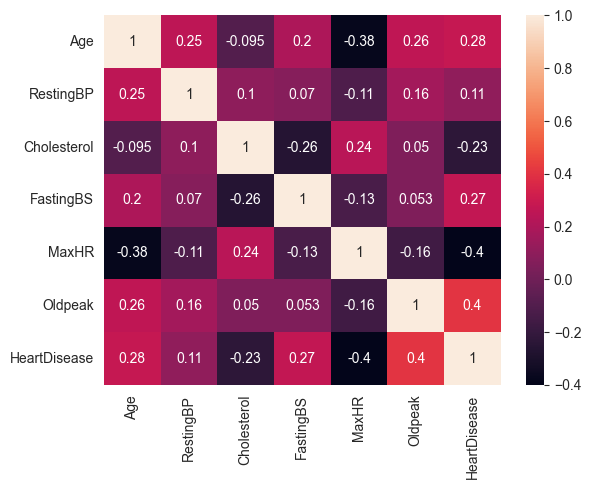

In [6]:
sns.heatmap(df.corr(numeric_only=True), annot=True)
plt.show()

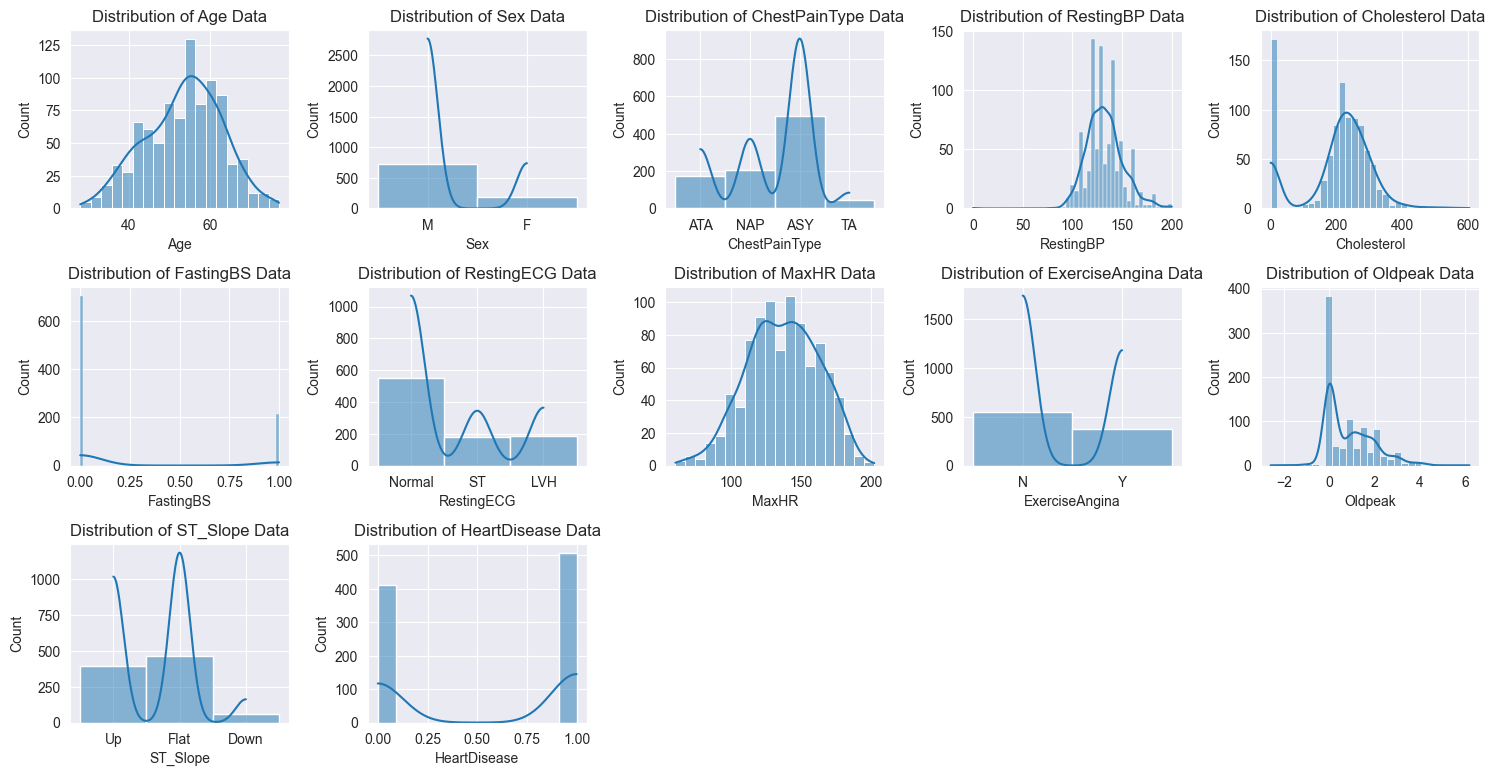

In [7]:
plt.figure(figsize=(15,10))
for i,col in enumerate(df.columns,1):
    plt.subplot(4,5,i)
    plt.title(f"Distribution of {col} Data")
    sns.histplot(df[col],kde=True)
    plt.tight_layout()
    plt.plot()

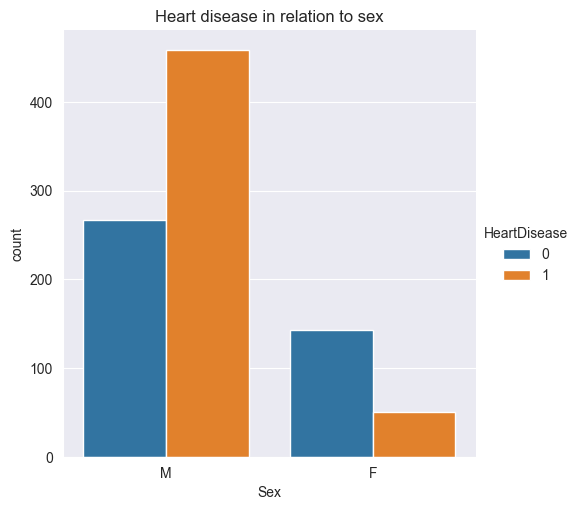

Proportion of men with heart disease: 0.6317241379310344 %
Proportion of women with heart disease: 0.25906735751295334 %


In [8]:
sns.catplot(data=df, x="Sex", hue="HeartDisease", kind="count")
plt.title("Heart disease in relation to sex")
plt.show()
man_with_heart_disease = df[(df['Sex'] == "M") & (df['HeartDisease'] == 1)]
man_without_heart_disease = df[(df['Sex'] == "M") & (df['HeartDisease'] == 0)]
woman_with_heart_disease = df[(df['Sex'] == "F") & (df['HeartDisease'] == 1)]
woman_without_heart_disease = df[(df['Sex'] == "F") & (df['HeartDisease'] == 0)]
print(f"Proportion of men with heart disease: {len(man_with_heart_disease) / (len(man_without_heart_disease) + len(man_with_heart_disease))} %")
print(f"Proportion of women with heart disease: {len(woman_with_heart_disease) / (len(woman_without_heart_disease) + len(woman_with_heart_disease))} %")

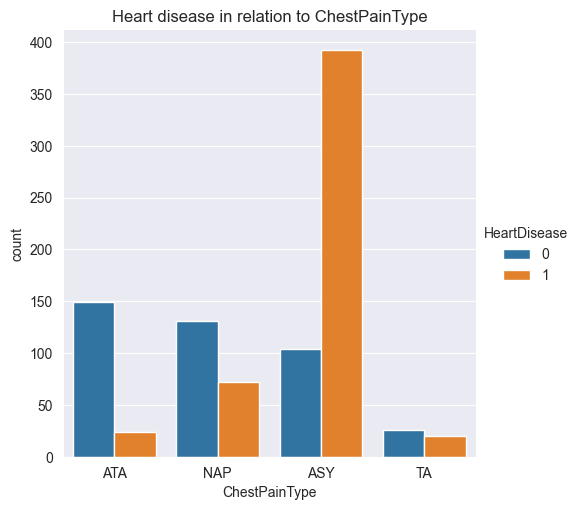

In [9]:
sns.catplot(data=df, x="ChestPainType", hue="HeartDisease", kind="count")
plt.title("Heart disease in relation to ChestPainType")
plt.show()

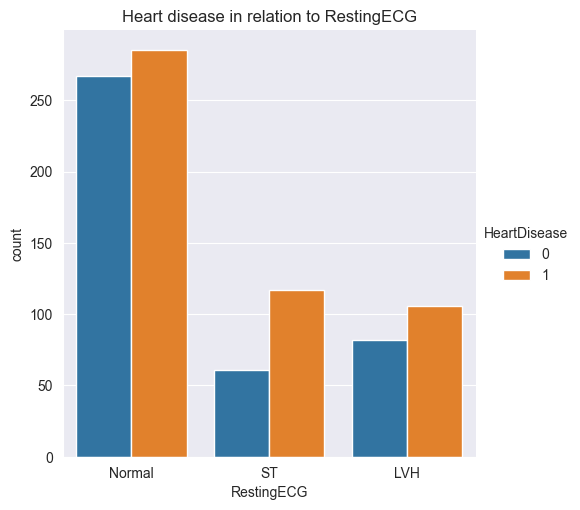

In [10]:
sns.catplot(df, x="RestingECG", hue="HeartDisease", kind="count")
plt.title("Heart disease in relation to RestingECG")
plt.show()

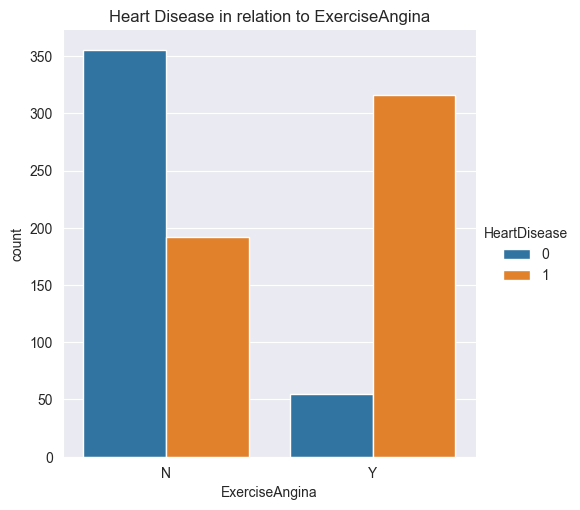

In [11]:
sns.catplot(df, x="ExerciseAngina", hue="HeartDisease", kind="count")
plt.title("Heart Disease in relation to ExerciseAngina")
plt.show()

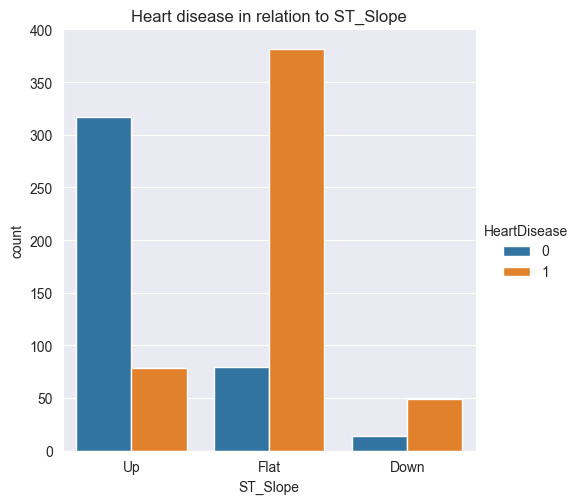

In [12]:
sns.catplot(df, x="ST_Slope", hue="HeartDisease", kind="count")
plt.title("Heart disease in relation to ST_Slope")
plt.show()

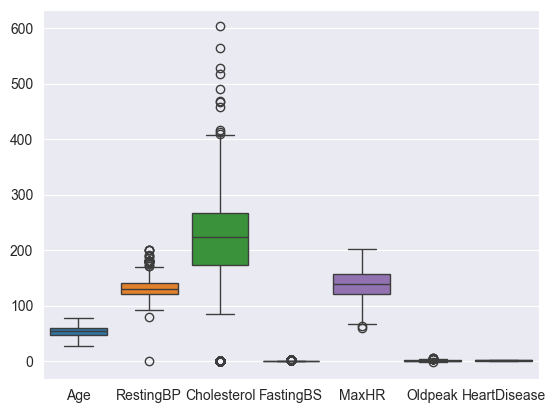

In [13]:
sns.boxplot(data=df)
plt.show()

In [14]:
"""
Préparation des données : Effectuer les transformations nécessaires pour rendre les
données utilisables dans les modèles (par exemple, gestion des valeurs manquantes,
transformation des variables catégorielles, gestion des valeurs aberrantes).
"""

# manage missing values
print(f"Nb lines before dropna {df.shape[0]}")
df = df.dropna()
print(f"Nb lines after dropna {df.shape[0]}") # all lines have complete data

Nb lines before dropna 918
Nb lines after dropna 918


Outliers for RestingBP (28):
109    190
123    180
189    180
190    180
241    200
274    180
275    180
278    180
314     80
365    200
372    185
399    200
411    180
423    180
449      0
475    178
550    172
585    180
592    190
673    174
702    178
725    180
732    200
759    192
774    178
780    180
855    180
880    172
Name: RestingBP, dtype: int64


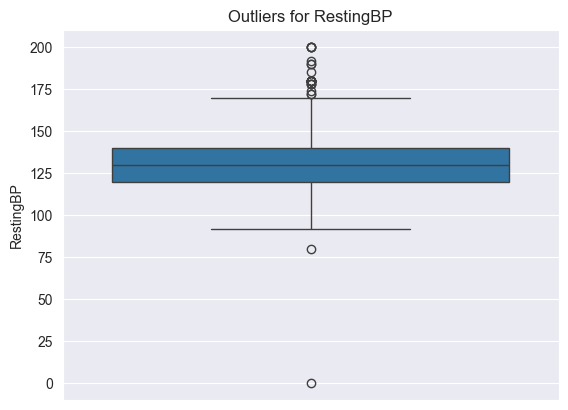

Outliers for Cholesterol (183):
28     468
30     518
69     412
76     529
103    466
149    603
250    491
293      0
294      0
295      0
296      0
297      0
298      0
299      0
300      0
301      0
302      0
303      0
304      0
305      0
306      0
307      0
308      0
309      0
310      0
311      0
312      0
313      0
314      0
315      0
316      0
317      0
318      0
319      0
320      0
321      0
322      0
323      0
324      0
325      0
326      0
327      0
328      0
329      0
330      0
331      0
332      0
333      0
334      0
335      0
336      0
337      0
338      0
339      0
340      0
341      0
342      0
343      0
344      0
345      0
346      0
347      0
348      0
349      0
350      0
351      0
352      0
353      0
354      0
355      0
356      0
357      0
358      0
359      0
360      0
361      0
362      0
363      0
364      0
365      0
366      0
367      0
368      0
369      0
370      0
371      0
372      0
373      0


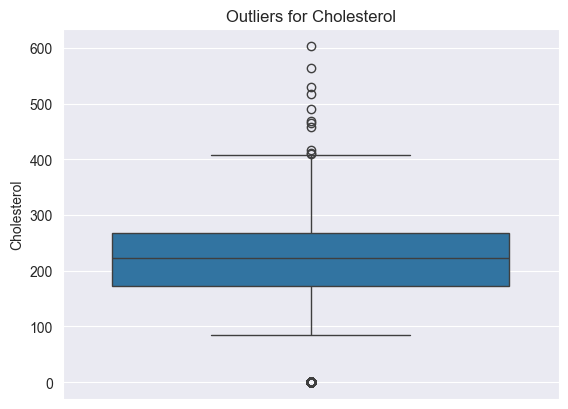

Outliers for FastingBS (214):
36     1
38     1
52     1
84     1
86     1
97     1
103    1
105    1
112    1
117    1
120    1
128    1
149    1
155    1
160    1
165    1
185    1
187    1
210    1
224    1
242    1
247    1
294    1
295    1
296    1
297    1
298    1
299    1
300    1
302    1
303    1
304    1
305    1
306    1
308    1
309    1
311    1
312    1
313    1
315    1
316    1
317    1
318    1
319    1
320    1
321    1
322    1
323    1
324    1
325    1
327    1
328    1
329    1
330    1
331    1
333    1
334    1
335    1
337    1
338    1
339    1
340    1
341    1
342    1
343    1
344    1
347    1
349    1
350    1
377    1
378    1
389    1
393    1
394    1
395    1
396    1
397    1
398    1
399    1
400    1
401    1
402    1
403    1
404    1
405    1
406    1
407    1
408    1
409    1
410    1
411    1
412    1
413    1
414    1
415    1
420    1
422    1
424    1
425    1
430    1
437    1
441    1
442    1
443    1
448    1
454    1
457    1
458    

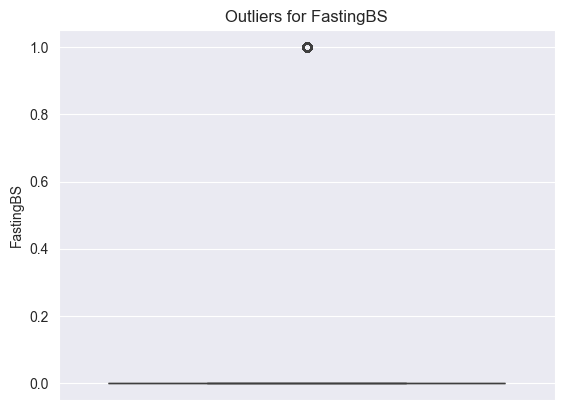

Outliers for MaxHR (2):
370    63
390    60
Name: MaxHR, dtype: int64


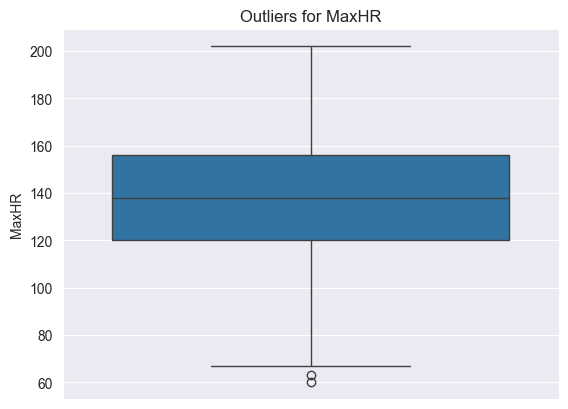

Outliers for Oldpeak (16):
68     4.0
166    5.0
324   -2.6
500    4.0
521    4.0
537    4.0
559    4.0
624    4.0
702    4.2
732    4.0
771    5.6
775    3.8
791    4.2
850    6.2
900    4.4
908    4.0
Name: Oldpeak, dtype: float64


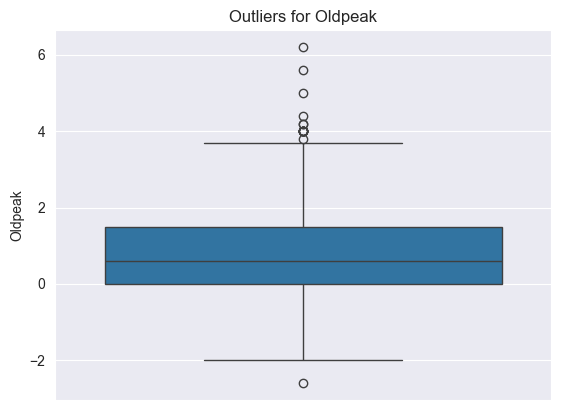

In [15]:
# manage outliers
def find_outliers(column_name : str)-> pd.DataFrame:
    Q1 = df[column_name].quantile(0.25)
    Q3 = df[column_name].quantile(0.75)
    IQR = Q3 - Q1
    pd = df[(df[column_name]>(Q3 + 1.5*IQR)) | (df[column_name]<(Q1 - 1.5*IQR))]
    return pd if not pd.empty else None

for col in df:
    col_type = df[col].dtypes
    if col_type == np.int64 or col_type == np.float64:
        outliers = find_outliers(col)
        if outliers is not None:
            print(f"Outliers for {col} ({len(outliers)}):")
            print(outliers[col])
            sns.boxplot(data=df[col])
            plt.title(f"Outliers for {col}")
            plt.show()


In [16]:
# Our goal is now to replace aberrant outliers with another value

def replace_aberrant_values(column_name : str, min_threshold:int, max_threshold:int)-> pd.DataFrame:
    print(f"Mean before replacement: {df[column_name].mean()}")
    values_to_replace_mask = (df[column_name]<min_threshold) | (df[column_name]>max_threshold)
    replacement_value = df[column_name].median()
    df.loc[values_to_replace_mask, column_name] = replacement_value
    print(f"Mean after replacement: {df[column_name].mean()}")

In [17]:
"""
Age
RestingBP
Cholesterol
Oldpeak
"""

replace_aberrant_values("Age", 0, 122)
replace_aberrant_values("RestingBP", 90, 120)
replace_aberrant_values("Cholesterol", 0, 560)
replace_aberrant_values("Oldpeak", 0, 6)


Mean before replacement: 53.510893246187365
Mean after replacement: 53.510893246187365
Mean before replacement: 132.39651416122004
Mean after replacement: 124.87472766884531
Mean before replacement: 198.7995642701525
Mean after replacement: 198.01416122004358
Mean before replacement: 0.8873638344226579
Mean after replacement: 0.9037037037037036


In [18]:
# fix categorical values with problem

categorical_features = [
    "Sex",
    "ChestPainType",
    "FastingBS",
    "RestingECG",
    "ExerciseAngina",
    "ST_Slope",
    "HeartDisease"
]

for col in categorical_features:
    print(df[col].unique())

# remove false category
a = ['M', 'F']
df = df[df['Sex'].isin(a)]

['M' 'F']
['ATA' 'NAP' 'ASY' 'TA']
[0 1]
['Normal' 'ST' 'LVH']
['N' 'Y']
['Up' 'Flat' 'Down']
[0 1]


In [19]:
# transform categorical values
from sklearn.preprocessing import OneHotEncoder

# replace sex by 0 or 1
df.Sex.replace(to_replace=['M', 'F'], value=[0, 1], inplace=True)

# replace ChestPainType with one hot encoding
if 'ChestPainType' in df.columns:
    chest_pain_type_one_hot = pd.get_dummies(df['ChestPainType'], prefix='ChestPainType').astype(int)
    df.drop(['ChestPainType'], axis=1, inplace=True)
    df[chest_pain_type_one_hot.columns] = chest_pain_type_one_hot

# replace RestingECG by one hot encoding
if 'RestingECG' in df.columns:
    resting_ecg_one_hot = pd.get_dummies(df['RestingECG'], prefix='RestingECG').astype(int)
    df.drop(['RestingECG'], axis=1, inplace=True)
    df[resting_ecg_one_hot.columns] = resting_ecg_one_hot

# replace ExerciseAngina by 0 or 1
df.ExerciseAngina.replace(to_replace=['N', 'Y'], value=[0, 1], inplace=True)

# replace ST_Slope by one hot encoding
if 'ST_Slope' in df.columns:
    st_slope_one_hot = pd.get_dummies(df['ST_Slope'], prefix='ST_Slope').astype(int)
    df.drop(['ST_Slope'], axis=1, inplace=True)
    df[st_slope_one_hot.columns] = st_slope_one_hot

/var/folders/0x/dznzjnpd7r3_cd7ybxbm6yjc0000gn/T/ipykernel_1309/2315672060.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df.Sex.replace(to_replace=['M', 'F'], value=[0, 1], inplace=True)
/var/folders/0x/dznzjnpd7r3_cd7ybxbm6yjc0000gn/T/ipykernel_1309/2315672060.py:5: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_dow

In [20]:
# Create X & y

# We don't use RestingBP & Cholesterol because there is a low correlation
X = df[['Age', 'Sex', 'FastingBS', 'MaxHR', 'ExerciseAngina', 'Oldpeak', 'ChestPainType_ASY', 'ChestPainType_ATA', 'ChestPainType_NAP', 'ChestPainType_TA',
'RestingECG_LVH', 'RestingECG_Normal', 'RestingECG_ST', 'ST_Slope_Down', 'ST_Slope_Flat', 'ST_Slope_Up']]

y = df['HeartDisease']

scaler = StandardScaler()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [21]:
"""
Modélisation : Utiliser des algorithmes de classification pour prédire si les sujets étudiés
ont une insuffisance cardiaque. Les algorithmes à considérer sont ceux du cours,
notamment : kNN, arbre de décision, forêts aléatoires, régression logistique et réseaux de
neurones. Il faudra également choisir un algorithme de classification non vu en cours,
l’expliquer brièvement et le tester.
"""

from sklearn.model_selection import cross_val_score

In [22]:
# LogisticRegression

model_logistic_regression = LogisticRegression()
model_logistic_regression.fit(X_train_scaled, y_train)
y_pred_train = model_logistic_regression.predict(X_train_scaled)
y_pred_test = model_logistic_regression.predict(X_test_scaled)

print(f"Accuracy score for train: {accuracy_score(y_train, y_pred_train)}")
print(f"Accuracy score for test: {accuracy_score(y_test, y_pred_test)}")
scores = cross_val_score(model_logistic_regression, X_train_scaled, y_train, cv=5)
print(f"Cross validation score: {scores.mean()}")

Accuracy score for train: 0.8569482288828338
Accuracy score for test: 0.8641304347826086
Cross validation score: 0.8501071661541328


In [23]:
# test with regularization
model_logistic_regression_l2 = LogisticRegression(penalty='l2')
model_logistic_regression_l2.fit(X_train_scaled, y_train)
y_pred_train = model_logistic_regression_l2.predict(X_train_scaled)
y_pred_test = model_logistic_regression_l2.predict(X_test_scaled)

print(f"Accuracy score for train: {accuracy_score(y_train, y_pred_train)}")
print(f"Accuracy score for test: {accuracy_score(y_test, y_pred_test)}")
scores = cross_val_score(model_logistic_regression_l2, X_train_scaled, y_train, cv=5)
print(f"Cross validation score: {scores.mean()}")

Accuracy score for train: 0.8569482288828338
Accuracy score for test: 0.8641304347826086
Cross validation score: 0.8501071661541328


In [24]:
# kNN
for n in range(1, 10):
    knn_classifier = KNeighborsClassifier(n_neighbors=n)
    knn_classifier.fit(X_train_scaled, y_train)
    y_pred_train = knn_classifier.predict(X_train_scaled)
    y_pred_test = knn_classifier.predict(X_test_scaled)
    print(f"Accuracy score for train (n={n}): {accuracy_score(y_train, y_pred_train)}")
    print(f"Accuracy score for test (n={n}) : {accuracy_score(y_test, y_pred_test)}")
    scores = cross_val_score(knn_classifier, X_train_scaled, y_train, cv=5)
    print(f"Cross validation score (n={n}) : {scores.mean()}")

Accuracy score for train (n=1): 1.0
Accuracy score for test (n=1) : 0.7880434782608695
Cross validation score (n=1) : 0.8174075109495853
Accuracy score for train (n=2): 0.9182561307901907
Accuracy score for test (n=2) : 0.7663043478260869
Cross validation score (n=2) : 0.7915385332215078
Accuracy score for train (n=3): 0.9100817438692098
Accuracy score for test (n=3) : 0.8152173913043478
Cross validation score (n=3) : 0.8310315907184792
Accuracy score for train (n=4): 0.888283378746594
Accuracy score for test (n=4) : 0.8152173913043478
Cross validation score (n=4) : 0.8215077811946697
Accuracy score for train (n=5): 0.8760217983651226
Accuracy score for test (n=5) : 0.8315217391304348
Cross validation score (n=5) : 0.836483086385239
Accuracy score for train (n=6): 0.8692098092643051
Accuracy score for test (n=6) : 0.8315217391304348
Cross validation score (n=6) : 0.8296990028888267
Accuracy score for train (n=7): 0.8637602179836512
Accuracy score for test (n=7) : 0.8478260869565217
Cro

In [25]:
# Random forest
for i in range(1, 20):
    random_forest_classifier = RandomForestClassifier(n_estimators=500, max_depth=i, max_features =
None, random_state=42)
    random_forest_classifier.fit(X_train, y_train)
    y_pred_train = random_forest_classifier.predict(X_train)
    y_pred_test = random_forest_classifier.predict(X_test)
    #print(f"Accuracy score for train: {accuracy_score(y_train, y_pred_train)}")
    print(f"Accuracy score for test ({i}): {accuracy_score(y_test, y_pred_test)}")
    scores = cross_val_score(random_forest_classifier, X_train, y_train, cv=5)
    print(f"Cross validation score ({i}) : {scores.mean()}")

Accuracy score for test (1): 0.7989130434782609
Cross validation score (1) : 0.8174261485416086
Accuracy score for test (2): 0.8152173913043478
Cross validation score (2) : 0.8187866927592955
Accuracy score for test (3): 0.8315217391304348
Cross validation score (3) : 0.8446370328953499
Accuracy score for test (4): 0.8315217391304348
Cross validation score (4) : 0.844655670487373
Accuracy score for test (5): 0.8369565217391305
Cross validation score (5) : 0.8446649892833846
Accuracy score for test (6): 0.8315217391304348
Cross validation score (6) : 0.8473674401267356
Accuracy score for test (7): 0.8152173913043478
Cross validation score (7) : 0.8391948560246016
Accuracy score for test (8): 0.8152173913043478
Cross validation score (8) : 0.8378343118069145
Accuracy score for test (9): 0.8315217391304348
Cross validation score (9) : 0.8391948560246016
Accuracy score for test (10): 0.8206521739130435
Cross validation score (10) : 0.8391948560246016
Accuracy score for test (11): 0.8206521

In [26]:
# Decision tree
from sklearn.model_selection import GridSearchCV

for i in range(1, 20):
    decision_tree_classifier = DecisionTreeClassifier(max_depth=i)
    decision_tree_classifier.fit(X_train, y_train)
    y_pred_train = decision_tree_classifier.predict(X_train)
    y_pred_test = decision_tree_classifier.predict(X_test)
    print(f"Accuracy score for train ({i}): {accuracy_score(y_train, y_pred_train)}")
    print(f"Accuracy score for test ({i}): {accuracy_score(y_test, y_pred_test)}")
    scores = cross_val_score(decision_tree_classifier, X_train, y_train, cv=5)
    print(f"Cross validation score ({i}): {scores.mean()}")

Accuracy score for train (1): 0.8174386920980926
Accuracy score for test (1): 0.7989130434782609
Cross validation score (1): 0.8174261485416086
Accuracy score for train (2): 0.8269754768392371
Accuracy score for test (2): 0.7934782608695652
Cross validation score (2): 0.8092535644394744
Accuracy score for train (3): 0.8651226158038147
Accuracy score for test (3): 0.8315217391304348
Cross validation score (3): 0.8255800950517193
Accuracy score for train (4): 0.8705722070844687
Accuracy score for test (4): 0.8206521739130435
Cross validation score (4): 0.8351411797595751
Accuracy score for train (5): 0.8937329700272479
Accuracy score for test (5): 0.8315217391304348
Cross validation score (5): 0.8228683254123567
Accuracy score for train (6): 0.9005449591280654
Accuracy score for test (6): 0.7771739130434783
Cross validation score (6): 0.8160749231199329
Accuracy score for train (7): 0.9250681198910081
Accuracy score for test (7): 0.782608695652174
Cross validation score (7): 0.8079116578

In [27]:
# GridSearchCV

max_depth = decision_tree_classifier.tree_.max_depth
param_grid = {'max_depth': list(range(1, max_depth + 1))}
print(param_grid)

grid_search = GridSearchCV(estimator=decision_tree_classifier, param_grid=param_grid,
scoring='accuracy', cv=5)

grid_search.fit(X_train, y_train)

print("Best de depth (scoring = 'accuracy') :")
print(grid_search.best_params_)
print("\nBest score accuracy score (cross-validation) :")
print(grid_search.best_score_)
# Test on test set
y_test_pred = grid_search.best_estimator_.predict(X_test)
print("\nAccuracy score for test : :")
print(accuracy_score(y_test, y_test_pred))

{'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18]}
Best de depth (scoring = 'accuracy') :
{'max_depth': 4}

Best score accuracy score (cross-validation) :
0.8351411797595751

Accuracy score for test : :
0.8206521739130435


In [28]:
# neural network
from keras.models import Sequential
from keras.layers import Dense, Input
from sklearn.metrics import accuracy_score

n_cols = X_train_scaled.shape[1]

nn_model = Sequential([
Input(shape=(n_cols,)), # Définir la forme d'entrée
Dense(units=100, activation='relu'),
Dense(units=1, activation='sigmoid') # Dernière couche
])

# Compiling the model
from keras.optimizers import Adam
optimizer = Adam(learning_rate=0.01)
nn_model.compile(optimizer=optimizer,loss='binary_crossentropy',metrics=['accuracy'])

nn_model.fit(X_train_scaled, y_train, epochs=50, batch_size=16)
y_test_proba = nn_model.predict(X_test_scaled)
y_test_pred = (y_test_proba >= 0.5).astype(int)
accuracy_test = accuracy_score(y_test, y_test_pred)
print('Test model accuracy:', accuracy_test)

Epoch 1/50
46/46 ━━━━━━━━━━━━━━━━━━━━ 1s 599us/step - accuracy: 0.8324 - loss: 0.3901 
Epoch 2/50
46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 514us/step - accuracy: 0.8583 - loss: 0.3341
Epoch 3/50
46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 504us/step - accuracy: 0.8597 - loss: 0.3310
Epoch 4/50
46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 501us/step - accuracy: 0.8774 - loss: 0.3116
Epoch 5/50
46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 512us/step - accuracy: 0.8692 - loss: 0.3130
Epoch 6/50
46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 501us/step - accuracy: 0.8787 - loss: 0.3062
Epoch 7/50
46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 492us/step - accuracy: 0.8828 - loss: 0.3075
Epoch 8/50
46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 510us/step - accuracy: 0.8692 - loss: 0.3077
Epoch 9/50
46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 466us/step - accuracy: 0.8883 - loss: 0.2876
Epoch 10/50
46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 496us/step - accuracy: 0.8937 - loss: 0.2848
Epoch 11/50
46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 498us/step - accuracy: 0.8815 - loss: 0.2823
Epoch 12/50
46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 487us/ste

In [29]:
# neura network
from keras.models import Sequential
from keras.layers import Dense, Input
from sklearn.metrics import accuracy_score

n_cols = X_train_scaled.shape[1]

for x in range(10):
    model2 = Sequential()
    model2.add(Input(shape=(n_cols,)))
    for i in range(10):
        model2.add(Dense(units=100, activation='relu'))
    model2.add(Dense(units=1, activation='sigmoid'))
    # Compiling the model
    from keras.optimizers import Adam
    optimizer = Adam(learning_rate=0.01)
    model2.compile(optimizer=optimizer,loss='binary_crossentropy',metrics=['accuracy'])
    model2.fit(X_train_scaled, y_train, epochs=50, batch_size=16)
    y_test_proba = model2.predict(X_test_scaled)
    y_test_pred = (y_test_proba >= 0.5).astype(int)
    accuracy_test = accuracy_score(y_test, y_test_pred)
    print(f"Test model accuracy for {x} hidden layers:", accuracy_test)

Epoch 1/50
46/46 ━━━━━━━━━━━━━━━━━━━━ 1s 825us/step - accuracy: 0.7752 - loss: 0.5206
Epoch 2/50
46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 777us/step - accuracy: 0.8624 - loss: 0.3633
Epoch 3/50
46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 832us/step - accuracy: 0.8610 - loss: 0.3722
Epoch 4/50
46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 856us/step - accuracy: 0.8597 - loss: 0.3630
Epoch 5/50
46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 893us/step - accuracy: 0.8610 - loss: 0.3600
Epoch 6/50
46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 890us/step - accuracy: 0.8624 - loss: 0.3873
Epoch 7/50
46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 869us/step - accuracy: 0.8556 - loss: 0.3270
Epoch 8/50
46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 852us/step - accuracy: 0.8433 - loss: 0.4321
Epoch 9/50
46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 849us/step - accuracy: 0.8583 - loss: 0.5144
Epoch 10/50
46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 883us/step - accuracy: 0.8556 - loss: 0.4106
Epoch 11/50
46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 863us/step - accuracy: 0.8460 - loss: 0.4510
Epoch 12/50
46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 839us/step

In [30]:
model_2_hidden_layer = Sequential()
model_2_hidden_layer.add(Input(shape=(n_cols,)))
for i in range(2):
    model_2_hidden_layer.add(Dense(units=100, activation='relu'))
model_2_hidden_layer.add(Dense(units=1, activation='sigmoid'))
# Compiling the model
from keras.optimizers import Adam
optimizer = Adam(learning_rate=0.01)
model_2_hidden_layer.compile(optimizer=optimizer,loss='binary_crossentropy')
model_2_hidden_layer.fit(X_train_scaled, y_train, epochs=50, batch_size=16)
y_test_proba = model_2_hidden_layer.predict(X_test_scaled)
y_test_pred = (y_test_proba >= 0.5).astype(int)
accuracy_test = accuracy_score(y_test, y_test_pred)
print(f"Test model accuracy for 2 hidden layers:", accuracy_test)

Epoch 1/50
46/46 ━━━━━━━━━━━━━━━━━━━━ 1s 587us/step - loss: 0.4069 
Epoch 2/50
46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 615us/step - loss: 0.3285
Epoch 3/50
46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 485us/step - loss: 0.3283
Epoch 4/50
46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 508us/step - loss: 0.3193
Epoch 5/50
46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 576us/step - loss: 0.3065
Epoch 6/50
46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 922us/step - loss: 0.2968
Epoch 7/50
46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.2974
Epoch 8/50
46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.2691 
Epoch 9/50
46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.2596 
Epoch 10/50
46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 614us/step - loss: 0.2522
Epoch 11/50
46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 651us/step - loss: 0.2810
Epoch 12/50
46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 522us/step - loss: 0.2380
Epoch 13/50
46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 509us/step - loss: 0.2189
Epoch 14/50
46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 499us/step - loss: 0.2252
Epoch 15/50
46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 491us/step - loss:

In [47]:
from sklearn.svm import SVC
kernels = ['linear', 'poly', 'rbf', 'sigmoid']
best_score = 0
best_params = ()
for kernel in kernels:
    for d in range(1, 10):
        svm_model = SVC(kernel=kernel, degree=d)
        svm_model.fit(X_train_scaled, y_train)
        y_test_proba = svm_model.predict(X_test_scaled)
        y_test_pred = (y_test_proba >= 0.5).astype(int)
        print(accuracy_score(y_test, y_test_pred))
        scores = cross_val_score(svm_model, X_train_scaled, y_train, cv=5)
        print(f"Cross validation score for kernel {kernel} and degree {d}: {scores.mean()}")
        if scores.mean() > best_score:
            best_score = scores.mean()
            best_params = (kernel, d, best_score)

print(f"Best params are kernel {best_params[0]} and degree {best_params[1]} with a score of {best_score}")

0.8586956521739131
Cross validation score for kernel linear and degree 1: 0.859640294473954
0.8586956521739131
Cross validation score for kernel linear and degree 2: 0.859640294473954
0.8586956521739131
Cross validation score for kernel linear and degree 3: 0.859640294473954
0.8586956521739131
Cross validation score for kernel linear and degree 4: 0.859640294473954
0.8586956521739131
Cross validation score for kernel linear and degree 5: 0.859640294473954
0.8586956521739131
Cross validation score for kernel linear and degree 6: 0.859640294473954
0.8586956521739131
Cross validation score for kernel linear and degree 7: 0.859640294473954
0.8586956521739131
Cross validation score for kernel linear and degree 8: 0.859640294473954
0.8586956521739131
Cross validation score for kernel linear and degree 9: 0.859640294473954
0.8641304347826086
Cross validation score for kernel poly and degree 1: 0.861000838691641
0.875
Cross validation score for kernel poly and degree 2: 0.799729754915665
0.831

In [32]:
"""
Évaluation : Mesurer la performance des modèles en utilisant des métriques adaptées.
"""
"""
model_logistic_regression
model_logistic_regression_l2
knn_classifier
random_forest_classifier
decision_tree_classifier
nn_model
model_5_hidden_layer
svm_model
"""

from scikeras.wrappers import KerasClassifier

def build_nn_model():
    model_2_hidden_layer = Sequential()
    model_2_hidden_layer.add(Input(shape=(n_cols,)))
    for i in range(2):
        model_2_hidden_layer.add(Dense(units=100, activation='relu'))
    model_2_hidden_layer.add(Dense(units=1, activation='sigmoid'))
    model_2_hidden_layer.compile(optimizer=Adam(learning_rate=0.01), loss='binary_crossentropy', metrics=['accuracy'])
    return model_2_hidden_layer

nn_classifier = KerasClassifier(model=build_nn_model, epochs=50, batch_size=16, verbose=0)

In [37]:
# pipelines for each models
from sklearn.pipeline import Pipeline

models = {
    "Logistic": Pipeline([
        ('scaler', StandardScaler()),
        ('logistic', LogisticRegression())
    ]),
    "Logistic_l2": Pipeline([
        ('scaler', StandardScaler()),
        ('logistic', LogisticRegression())
    ]),
    "KNN": Pipeline([
        ('scaler', StandardScaler()),
        ('knn', KNeighborsClassifier(n_neighbors=9))
    ]),
    "RandomForest": Pipeline([
        ('random_forest', RandomForestClassifier(n_estimators=500, max_depth=7, max_features =
None, random_state=42))
    ]),
    "GridSearchCV": Pipeline([
        ('grid_search', GridSearchCV(estimator=decision_tree_classifier, param_grid=param_grid,
scoring='accuracy', cv=5))
    ]),
    "SVM": Pipeline([
        ('scaler', StandardScaler()),
        ('svm', SVC(kernel='poly', degree=1))
    ]),
    "nn_classifier": Pipeline([
        ('scaler', StandardScaler()),
        ('nn_model', nn_classifier)
    ])
}

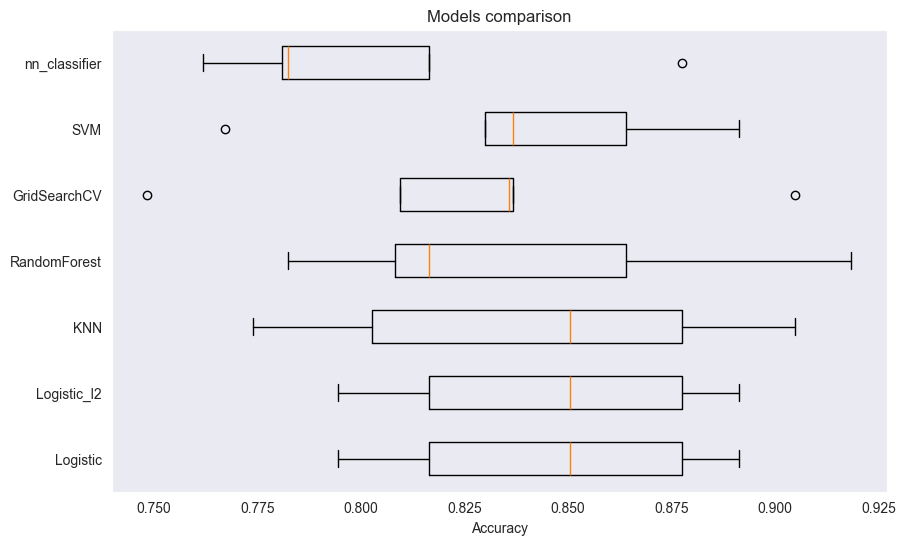

In [38]:
# Evaluate models with cross validation
from sklearn.model_selection import cross_val_score, KFold

results = []
kf = KFold(n_splits=5, random_state=42, shuffle=True)
for model in models.values():
    cv_results = cross_val_score(model, X_train, y_train, cv=kf,
    scoring='accuracy')
    results.append(cv_results)

# results
plt.figure(figsize=(10, 6))
plt.boxplot(results, tick_labels=models.keys(), vert=False)
plt.xlabel('Accuracy')
plt.title('Models comparison')
plt.grid()
plt.show()

In [39]:
from sklearn.metrics import mean_squared_error
scores = []

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    y_pred = (y_pred > 0.5).astype(int)
    print(f"{name} score : {accuracy_score(y_test, y_pred)}")
    scores.append((name, accuracy_score(y_test, y_pred)))

Logistic score : 0.8641304347826086
Logistic_l2 score : 0.8641304347826086
KNN score : 0.8586956521739131
RandomForest score : 0.8152173913043478
GridSearchCV score : 0.8206521739130435
SVM score : 0.8586956521739131
nn_classifier score : 0.8152173913043478
